## 1. Vorbereitung

Um das Risiko einer Überanpassung zu verhindern, kann die lineare/polynomiale Regression regularisiert werden. Dazu wird der Verlustfunktion ein zusätzlicher Regularisierungsterm hinzugefügt, der dafür sorgt, dass Koeffizienten kleiner Magnitude gegenüber Koeffizienten großer Magnitude bevorzugt werden.

Scikit-Learn stellt die lineare Regression mit Regularisierung in den Klassen `Ridge`, `ElasticNet` und `Lasso` zur Verfügung.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from utils_overfitting import generate_data

In [3]:
## Hilfsfunktion zum Erstellen eines Modells mit Regularisierung und polynomischer Expansion
def get_polynomial_regression(degree=1, alpha=0.0):
    return make_pipeline(
        PolynomialFeatures(include_bias=False, degree=degree),
        Ridge(alpha=alpha, normalize=True, fit_intercept=True)
    )


def get_polynomial_regression_l1(degree=1, alpha=0.0):
    return make_pipeline(
        PolynomialFeatures(include_bias=False, degree=degree),
        Lasso(alpha=alpha, normalize=True, fit_intercept=True, max_iter=10000)
    )

In [4]:
# Wähle einen relativ hohen Grad der polynomischen Expansion
degree = 10

# je größer `alpha`, desto stärker die Regularisierung
alphas = [0.001, 1.0, 100.0]

# Ridge Regression ist Lineare Regression mit L2-Regularisierung (Weight Decay)
ridge_models = []
for alpha in alphas:
    new_model = get_polynomial_regression(degree=degree, alpha=alpha)
    ridge_models.append(new_model)

In [6]:
# Alternative:
# ridge_models = [get_polynomial_regression(degree=degree, alpha=alpha) for alpha in alphas]

# Lasso Regression ist Lineare Regression mit L1-Regularisierung
lasso_models = [get_polynomial_regression_l1(degree=degree, alpha=alpha) for alpha in alphas]


x_train, y_train = generate_data(n_samples=20)

# model fitting
for model in ridge_models:
    reg = model.fit(x_train, y_train)

for model in lasso_models:
     model.fit(x_train, y_train)
    

/home/mathias/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.86901648418586, tolerance: 0.7783803853934331
  model = cd_fast.enet_coordinate_descent(


## Visualisierung der Ridge Modelle

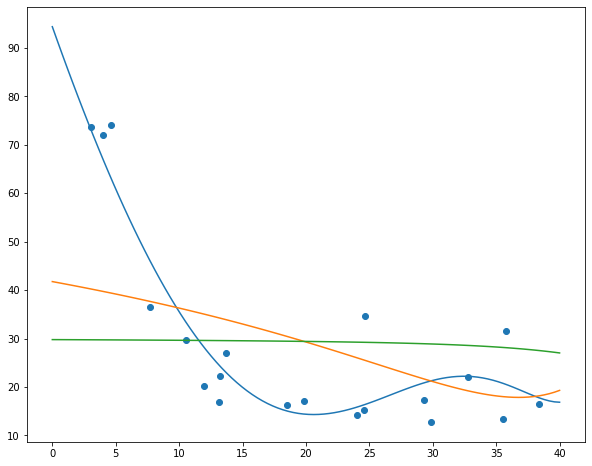

In [8]:
plt.figure(figsize=(10, 8))
# Trainingsdaten plotten
plt.scatter(x_train, y_train)

### zur Visualisierung
# x-Wertebereich zum Plotten
x_vis = np.linspace(0, 40, 100)
# individuelle Vorhersage-Funktionen
y_vis = np.array([
    model.predict(x_vis[:, np.newaxis]) for model in ridge_models
])
# komplizierte Zeile zum Plotten aller Fits gleichzeitig
plt.plot(np.repeat(x_vis[:, np.newaxis], len(ridge_models), axis=1), y_vis.T);

In [9]:
def get_weights(model):
    # Pipelines funktionieren wie eine Liste. Wir indizieren mit einer -1, da
    # das Modell um das letzte Element der Pipeline ist.
    return model[-1].coef_

In [10]:
# im Folgenden lassen sich die Gewichte der polynomischen Regression für verschiedene alphas miteinander
# vergleichen.
get_weights(ridge_models[0])

array([-7.38542123e+00,  1.24502446e-01,  2.56393873e-03,  1.08598460e-05,
       -6.69332815e-07, -2.44520274e-08, -4.94480263e-10, -4.96514850e-12,
        1.01316572e-13,  7.86776898e-15])

In [11]:
get_weights(ridge_models[1])

array([-4.84087989e-01, -5.58990632e-03, -6.46115830e-05, -5.73167422e-07,
        1.55069019e-09,  2.97289184e-10,  1.18066072e-11,  3.69993692e-13,
        1.05050273e-14,  2.82388770e-16])

In [12]:
get_weights(ridge_models[2])

array([-1.12835626e-02, -2.04507762e-04, -4.37072326e-06, -1.00236737e-07,
       -2.38836276e-09, -5.82343588e-11, -1.44164652e-12, -3.60714653e-14,
       -9.09544184e-16, -2.30654975e-17])

## Visualisierung der Lasso Modelle

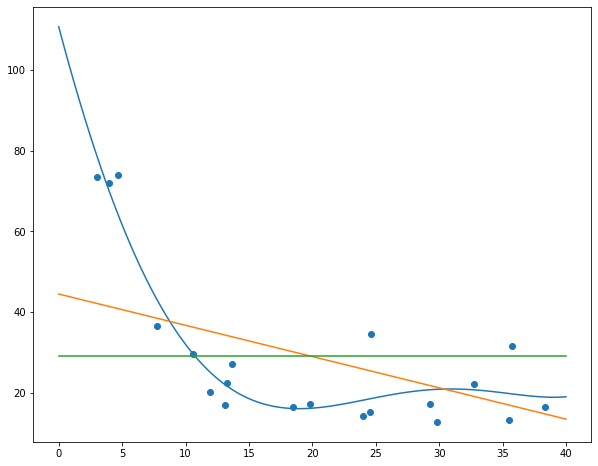

In [14]:
plt.figure(figsize=(10, 8))
# Trainingsdaten plotten
plt.scatter(x_train, y_train)

### zur Visualisierung
# x-Wertebereich zum Plotten
x_vis = np.linspace(0, 40, 100)
# individuelle Vorhersage-Funktionen
y_vis = np.array([
    model.predict(x_vis[:, np.newaxis]) for model in lasso_models
])
# komplizierte Zeile zum Plotten aller Fits gleichzeitig
plt.plot(np.repeat(x_vis[:, np.newaxis], len(ridge_models), axis=1), y_vis.T);

In [15]:
# im Folgenden lassen sich die Gewichte der polynomischen Regression für verschiedene alphas miteinander
# vergleichen.
get_weights(lasso_models[0])

array([-1.18813309e+01,  4.18207839e-01, -3.98556608e-04, -1.27884146e-04,
       -3.87964726e-07,  0.00000000e+00,  3.02241405e-10,  1.44839407e-11,
        0.00000000e+00, -3.56694375e-15])

In [16]:
get_weights(lasso_models[1])

array([-0.77478461, -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [17]:
get_weights(lasso_models[2])

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])